In [2]:
import pickle
import numpy as np
import glob
from Training.FCN.label import Label 

import os

import numpy as np
import scipy.ndimage as nd
import skimage
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from skimage import measure, segmentation
from skimage.draw import polygon, rectangle
from skimage.transform import resize

import config
import mask.maskHelper as mh
from clustering.clustering import run_clustering
from clustering.model import DataLoaderClustering, Network
from clustering.pageHandler import PageHandler, Pixel
from mask.unet import UNet
from page import Page

from PIL import Image


C:\Users\Arne\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

def load(file):
    a = open(file, 'rb')
    o = pickle.load(a)
    a.close()
    return o

time = load('./ious-time.txt')
timec = load('./ious-time-clus.txt')
funke = load('./ious-funke.txt')
funkec = load('./ious-funke-clus.txt')

In [4]:
t_p = []
tc_p = []
f_p = []
fc_p = []
for m in range(0, 110, 10):
    t_p.append(np.percentile(time, 100 - m) * 100 +  10 * np.percentile(time, 100 - m))
    tc_p.append(np.percentile(timec, 100 - m) * 100 +  10 * np.percentile(time, 100 - m))
    f_p.append(np.percentile(funke, 100 - m) * 100 )
    fc_p.append(np.percentile(funkec, 100 - m) * 100)




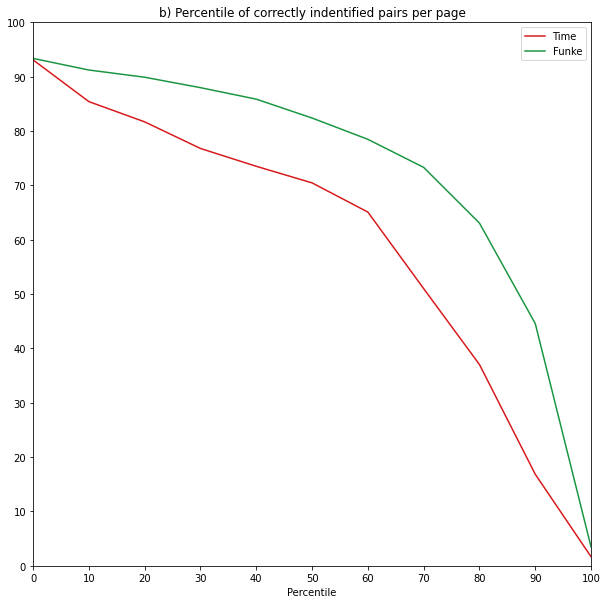

<Figure size 432x288 with 0 Axes>

In [7]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Creating plot

ax.plot(t_p, c='#D7191C',  linestyle='-')
#ax.plot(tc_p, c='#D7191C',  linestyle='--')
ax.plot(f_p, c='#1a9641',  linestyle='-')
#ax.plot(fc_p, c='#1a9641',  linestyle='-')
ax.set_ylim([0, 100])
plt.autoscale(tight=True)
ax.set_ylim([0, 100])
ax.set_xticks(range(0,11, 1), range(0,110, 10))
ax.set_yticks(range(0,110, 10))
ax.set_xlabel('Percentile')
ax.set_title("b) Percentile of correctly indentified pairs per page")

plt.plot([], c='#D7191C', label='Time')
#plt.plot([], c='#D7191C',  linestyle='--', label='Time Clustering')
plt.plot([], c='#1a9641', label='Funke')
#plt.plot([], c='#1a9641',  linestyle='--', label='Funke Clustering')
plt.legend()
plt.show()
plt.savefig("ious.pdf")
